# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Luke Hicks

## What does a Simple Linear Regression Model do?
#### It uses one independent variable to predict the value of a dependent variable

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
data = sns.load_dataset('diamonds')

In [13]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* It identifies correlations between each pair of numeric variables in a DataFrame
* It's a number between 1 and -1
* 1 indicates positive correlation
* -1 indicates negative correlation
* 0 indication no correlation

In [38]:
data_nums = data.select_dtypes(include='number')
data_nums.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

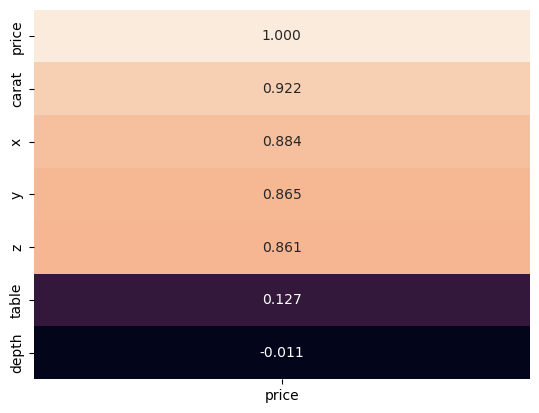

In [62]:
sns.heatmap(data=data_nums.corr()[['price']].sort_values(by='price',ascending=False),annot=True,cbar=False,fmt=f'.3f')

## Procedure for Creating and Using a Regression Model

1. Split the dataset between a training and test dataset
2. Create a regression model
3. Validate the model with a test dataset
4. If the model is valid, predict data with it

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [166]:
strongest_corr_column = data_nums.corr()[['price']].drop('price').idxmax()
strongest_corr_column

price    carat
dtype: object

In [196]:
x = data_nums[['carat']]
y = data_nums['price']

In [198]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=20)

In [200]:
model = LinearRegression()
print(model)

LinearRegression()


In [202]:
model.fit(x_train, y_train)

LinearRegression()

In [204]:
model.score(x_test,y_test)

0.8504107786474794

In [206]:
y_predicted = model.predict(x_test)
y_predicted

array([9540.64191438, 1940.07543252, 3180.98424589, ..., 9618.19871522,
       -464.18539337, 5507.68827094])

In [208]:
predicted_price = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted_price.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [216]:
joined_df = pd.DataFrame({
            'carat':x_test['carat'],
            'price':y_test,
            'predicted_price':y_predicted})
joined_df.head()

,carat,price,predicted_price
20244,1.52,8674,9540.641914
45013,0.54,1637,1940.075433
53351,0.70,2657,3180.984246
47212,0.59,1838,2327.859437
1460,0.86,2980,4421.893059


In [222]:
df_melted = pd.melt(joined_df, id_vars='carat',
                    value_vars=['price','predicted_price'],
                    var_name='price_type',
                    value_name='price_value')
df_melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


<Axes: xlabel='carat', ylabel='price_value'>

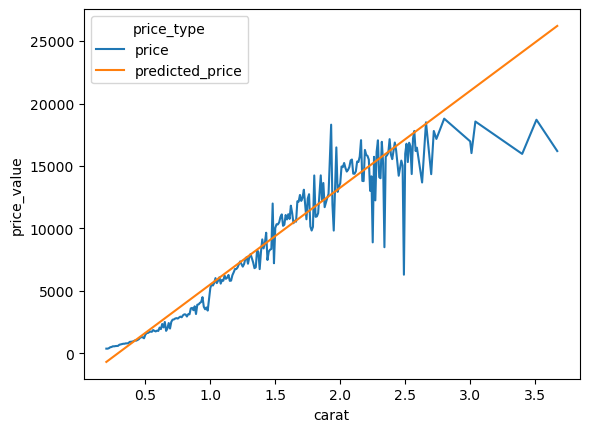

In [234]:
sns.lineplot(data=df_melted,x='carat',y='price_value',hue='price_type',errorbar=None)

## Regression line equation is **y=mx+b**, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **y-intercept**

In [240]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [244]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [246]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454457


In [248]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800454457


In [269]:
m_val = m[0]
# Estimating the price of a 0.70 carat diamond
price_70 = m_val * 0.70 + b
# Estimating the price of a 0.54 carat diamond
price_54 = m_val * 0.54 + b

In [271]:
print(f'The estimated price for a 0.70 carat diamond is ${price_70:,.2f}')
print(f'The estimated price for a 0.54 carat diamond is ${price_54:,.2f}')

The estimated price for a 0.70 carat diamond is $3,173.14
The estimated price for a 0.54 carat diamond is $1,932.11


## The predicted price for a 0.70 carat diamond was 3180 and the actual price was 3173. The same can be said about the predicted and actual price of the 0.54 carat diamond. Therefore, they were close. 